In [1]:
import praw
import pandas as pd
from PIL import Image
import requests

#access api
def get_image_posts(keywords, subreddits=None, limit=None, max_posts=600000):
    reddit = praw.Reddit(
        client_id='Pgl8vZVzWgNonBLHHzSwzw',
        client_secret='UVZMYLXI56NoZgt41t0T4ufHk3RYHQ',
        user_agent='Poli179proj/1.0 (https://github.com/lariosmel13/poli17proj.git)'
    )
#access posts
    posts = []
    
    if subreddits is None:
        subreddits = ["all"]
    else:
        subreddits = list(map(str.lower, subreddits))
    
    for subreddit_name in subreddits:
        subreddit = reddit.subreddit(subreddit_name)
        for submission in subreddit.search(query=' OR '.join(keywords), sort='relevance', syntax='cloudsearch', time_filter='all', limit=None):
            if len(posts) >= max_posts:
                break
            #get subreddit name, title,image url, upvotes, date posted
            submission_title = submission.title if isinstance(submission.title, str) else str(submission.title)
            if not submission.is_self and any(keyword in submission_title.lower() for keyword in keywords):
                submission_date=pd.to_datetime(submission.created_utc,unit='s')
                if submission_date.year==2024:
                    posts.append({
                        'Subreddit': submission.subreddit.display_name,
                        'Title': submission_title,
                        'Image URL': submission.url,
                        'Upvotes': submission.score,
                        'Date': submission.created_utc
                    })
    return posts

#target keywords and subreddits
keywords = ['palestine','protest','israel','encampent']
subreddits = ['ucla', 'UCSD', 'UCSB', 'UCSC', 'UCI', 'UCDavis', 'ucmerced', 'ucr', 'berkeley','columbia','Harvard','yale','princeton','georgetown','nyu','UIUC','aggies','ucf','Purdue','ASU','rit','uofm','rutgers','VirginiaTech','csuf','CSULB','CSULA','humboldtstate','Drexel','EmersonCollege','Emory','IndianaUniversity','mit','riceuniversity','stanford','PennStateUniversity','Berklee','bostoncollege','BostonU','Bowdoin','BrownU','Caltech','calarts','CalPoly','chapmanuniversity','Cornell','gwu','gatech','LSU','LMU','washu','VirginiaTech','Vanderbilt','UoP','udub','USC','usfca','UPenn','seattleu','scrippscollege','scad','SJSU','Pepperdine','pace','OregonStateUniv','jhu','harveymudd','Fordham','CUNY','claremontcolleges','Grinnell','Gonzaga','cmu','CalPolyPomona','CSUS','AmericanU','amherstcollege','baylor']

posts = get_image_posts(keywords, subreddits=subreddits, limit=None, max_posts=600000)
df = pd.DataFrame(posts)
#create new df
selected_columns = ['Subreddit', 'Image URL', 'Upvotes', 'Date']
selected_df = df[selected_columns]
print(selected_df)



     Subreddit                                          Image URL  Upvotes  \
0         ucla               https://i.redd.it/6tofwqt84nwc1.jpeg     1191   
1         ucla                    https://v.redd.it/hy5tyh0rvrxc1      285   
2         ucla               https://i.redd.it/e5m85zlngvyc1.jpeg       92   
3         ucla               https://i.redd.it/ewqprnomvnwc1.jpeg      710   
4         ucla  https://www.cbsnews.com/losangeles/news/pro-is...       53   
..         ...                                                ...      ...   
341        cmu               https://i.redd.it/k4e76uphffhc1.jpeg        0   
342       CSUS             https://www.reddit.com/gallery/1cg6iec      132   
343       CSUS   https://www.csus.edu/alert/#encampment-on-campus       13   
344       CSUS             https://www.reddit.com/gallery/1byg3ea      169   
345  AmericanU             https://www.reddit.com/gallery/1cd3gt8        0   

             Date  
0    1.714057e+09  
1    1.714551e+09  
2  

In [2]:
#export df to csv file
selected_df.to_csv('reddit_postsnew2.csv',index=False)

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
#replace image 
df2=pd.read_csv('reddit_postsnew22.csv')
#drop rows where column has no image
df2=df2.drop(df2[df2['Image']=='none'].index)

#drops image column
df2=df2.drop(columns=['Image'])
print(df2)

    Subreddit                               Image URL  Upvotes        Date  \
0        ucla    https://i.redd.it/6tofwqt84nwc1.jpeg     1191  1714057255   
2        ucla    https://i.redd.it/e5m85zlngvyc1.jpeg       92  1715029980   
3        ucla    https://i.redd.it/ewqprnomvnwc1.jpeg      716  1714066466   
7        ucla    https://i.redd.it/hkq810spbpxc1.jpeg      251  1714519831   
11       ucla  https://www.reddit.com/gallery/1cyuhk6      469  1716475418   
..        ...                                     ...      ...         ...   
328       USC  https://www.reddit.com/gallery/1ccjuxc      205  1714022182   
329       USC  https://www.reddit.com/gallery/1cdsos3      185  1714155969   
340      CUNY  https://www.reddit.com/gallery/1am34q7       24  1707418507   
341   Gonzaga    https://i.redd.it/4niav6kneuxc1.jpeg        1  1714581356   
343      CSUS  https://www.reddit.com/gallery/1cg6iec      131  1714415405   

              ID  
0        Protest  
2         School  
3     

In [5]:
import pandas as pd


def min_max_normalize_group(group):
    min_val = group.min()
    max_val = group.max()
    return (group - min_val) / (max_val - min_val)

# group by ID and apply Min-Max Scaling to Upvotes
normalized_df = df2.groupby('ID')['Upvotes'].apply(min_max_normalize_group)

print(normalized_df)


ID              
Misc         11     0.330042
             27     0.028209
             41     0.092384
             78     0.097320
             85     0.084626
                      ...   
Screenshots  271    0.071043
             272    0.169065
             328    0.183453
             341    0.000000
             343    0.116906
Name: Upvotes, Length: 115, dtype: float64


In [6]:
add_upvotes=normalized_df.groupby('ID').sum()
print(add_upvotes)
most_upvotes=add_upvotes.idxmax()
print(most_upvotes)

ID
Misc            5.668547
Protest        11.971039
School          3.825000
Screenshots     4.557554
Name: Upvotes, dtype: float64
Protest


In [7]:
new_df = df2.drop(columns=['Date', 'Subreddit','Image URL'])

print(new_df)

     Upvotes           ID
0       1191      Protest
2         92       School
3        716      Protest
7        251       School
11       469         Misc
..       ...          ...
328      205  Screenshots
329      185      Protest
340       24      Protest
341        1  Screenshots
343      131  Screenshots

[116 rows x 2 columns]


In [8]:
import pandas as pd

def min_max_normalize_group(group):
    min_val = group.min()
    max_val = group.max()
    return (group - min_val) / (max_val - min_val)


normalized_df = df2.groupby('ID')['Upvotes'].apply(min_max_normalize_group).reset_index()

print(normalized_df)


              ID  level_1   Upvotes
0           Misc       11  0.330042
1           Misc       27  0.028209
2           Misc       41  0.092384
3           Misc       78  0.097320
4           Misc       85  0.084626
..           ...      ...       ...
110  Screenshots      271  0.071043
111  Screenshots      272  0.169065
112  Screenshots      328  0.183453
113  Screenshots      341  0.000000
114  Screenshots      343  0.116906

[115 rows x 3 columns]


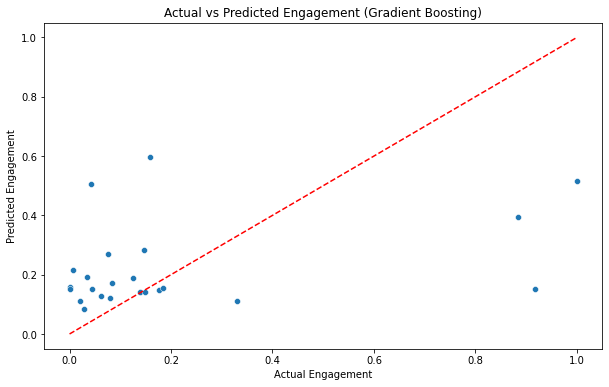

Feature Importances:
level_1 : 0.9242322832020349
ID_Misc : 0.019415558389848743
ID_Protest : 0.020358097414728337
ID_School : 0.020974970469276773
ID_Screenshots : 0.015019090524111437
MSE: 0.07511681714524578


In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.get_dummies(normalized_df, columns=['ID'])

X = df.drop(columns=['Upvotes'])
y = df['Upvotes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# hyperparameter tuning
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
grid_search_gb = GridSearchCV(GradientBoostingRegressor(), param_grid_gb, cv=5)
grid_search_gb.fit(X_train, y_train)
best_gb_model = grid_search_gb.best_estimator_

# prediction
y_pred = best_gb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# actual vs predicted engagement
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Engagement')
plt.ylabel('Predicted Engagement')
plt.title('Actual vs Predicted Engagement (Gradient Boosting)')

# diagonal line
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')
plt.show()

# coefficients
if hasattr(best_gb_model, 'feature_importances_'):
    print('Feature Importances:')
    for feature, importance in zip(X.columns, best_gb_model.feature_importances_):
        print(feature, ':', importance)
print('MSE:', mse)
